## Logistic Regression and KNN classification Assignment

Subsidy Inc. delivers subsidies to individuals based on their income. Accurate income data is one of the hardest piece of data to obtain across the world. Subsidy Inc. has obtained a large set of authenticated data on individual’s income, demographic parameters and a few financial parameters. Subsidy Inc. wishes us o develop an income classifier system for individuals. 
The objective is to simplify the data system by reducing the variables to be studied without sacrificing too much of accuracy. Such a system would help subsidy Inc. in planning subsidy outlay, monitoring and preventing misuse.
Variable Description:
1.	Age: the age of individual in years
2.	JobType: Wrking status of person, which sector does he work in
3.	EDType: the level of education
4.	MaritalStatus: the mariatal status of individual
5.	Occupation: the type of work the individual does
6.	Relationship: relationship of a person to his/ household
7.	Race: the individual’s race
8.	Gender: The individual’s gender
9.	Capitalgain: the capital gains of the individual (from selling an asset such as stock or bond for more than the original purchase price
10.	Capitalloss: : the capital loss of the individual (from selling an asset such as stock or bond for less than the original purchase price
11.	Hoursperweek: the number of hours an individual works per week
12.	Nativecountry: the native country of individual
13.	Salstat: salary status of an individual


### Include following things in your solution
1.	Display summary of categorical variables if any.
2.	Handle null values if any
3.	Do the exploratory data analysis of dependent variables w.r.t. each(appropriate) independent variable using matplotlib and comment on the output.
4.	Encode the categorical variables using appropriate encoding methods.
5.	Check for insignificant independent variables and observe if removal of such variables affects the accuracy
6.	Develop a classifier with good accuracy using Logistic Regression and KNN classification. Graphical display of accuracy and error rate for different values of K is desired. Also show confusion matrix, ROC-AUC curve and classification report.
7.	Check if k-fold cross validation helps to improve accuracy in Logistic regression and KNN classification


In [480]:
import pandas as pd

In [481]:
df=pd.read_csv("income.csv",na_values=[' ?'])

In [482]:
df.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"


#### checking and handling null values

In [483]:
df.isna().sum()

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

In [484]:
df.isnull().sum()

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

In [485]:
#shape before removing na
df.shape

(31978, 13)

In [486]:
#target var value counts before removing na
df.SalStat.value_counts()
#therefore imbalanced dataset

 less than or equal to 50,000    24283
 greater than 50,000              7695
Name: SalStat, dtype: int64

In [487]:
df.dropna(inplace=True)

In [488]:
#shape after removing na
df.shape

(30162, 13)

In [489]:
#target var value counts after removing na
df.SalStat.value_counts()
#most of the rows deleted are of less than or equal to 50,000 therefore no problem

 less than or equal to 50,000    22654
 greater than 50,000              7508
Name: SalStat, dtype: int64

In [490]:
df.isna().sum()
#hence no null or na values left

age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64

### EDA using matplotlib

In [491]:
from matplotlib import pyplot as plt
import numpy as np
import collections

In [492]:
df.SalStat.value_counts()

 less than or equal to 50,000    22654
 greater than 50,000              7508
Name: SalStat, dtype: int64

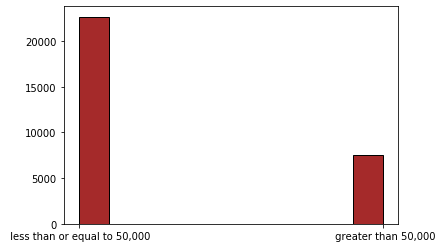

In [493]:
plt.hist(df.SalStat,edgecolor='black',color='brown')
plt.show()

Above graph shows that dataset is imbalanced

In [494]:
df1=df.loc[df.SalStat==" less than or equal to 50,000"]
df2=df.loc[df.SalStat==" greater than 50,000"]

#### wrt age

<function matplotlib.pyplot.show(*args, **kw)>

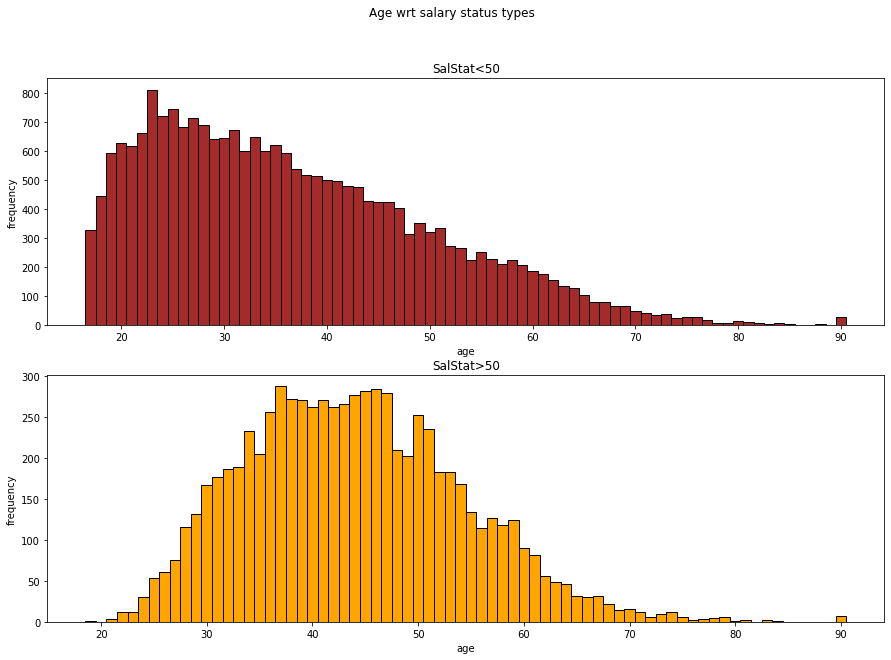

In [495]:
#separate plots

fig,(p1,p2)=plt.subplots(2,figsize=(15,10))

p1.bar(df1.age.value_counts().to_dict().keys(),df1.age.value_counts().to_dict().values(),color='brown',edgecolor='black',width=1)
p1.set(xlabel='age',ylabel="frequency")
p1.set_title("SalStat<50")

p2.bar(df2.age.value_counts().to_dict().keys(),df2.age.value_counts().to_dict().values(),color='orange',edgecolor='black',width=1)
p2.set(xlabel='age',ylabel="frequency")
p2.set_title("SalStat>50")
fig.suptitle("Age wrt salary status types")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

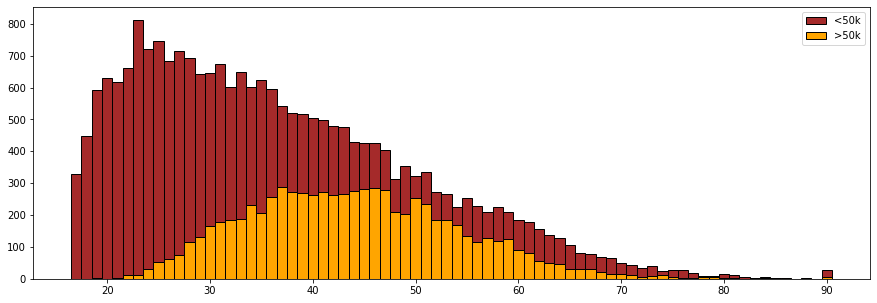

In [496]:
#combined plot

plt.figure(figsize=(15,5))
plt.bar(df1.age.value_counts().to_dict().keys(),df1.age.value_counts().to_dict().values(),color='brown',label='<50k',edgecolor='black',width=1)
plt.bar(df2.age.value_counts().to_dict().keys(),df2.age.value_counts().to_dict().values(),color='orange',label='>50k',edgecolor='black',width=1)
plt.legend()
plt.show

Above graph gives following conclusion:
1. people earning <50k salary are more than people earning >50k
2. also the graph indicates that most of the people earning <50k are in the early age 
3. most of the people earning >50k are in between the age range 25 to 60 and the peak is between the age 35 to 47
4. also there are hardly few people between age 70 to 90 still earning

In [497]:
def plotBarGraph(col,rot):
    #get the dictionary of categories and its value count
    d1=df1[col].value_counts().to_dict()
    d2=df2[col].value_counts().to_dict()

    #adding missing values if any to both dictionary (i.e making both dictionary having all the keys inspite of value 0)
    diff1=set(d1.keys())-set(d2.keys())
    for key in diff1:
        d2[key]=0
    diff2=set(d2.keys())-set(d1.keys())
    for key in diff2:
        d1[key]=0
    
    #preparing ordered dictionary to maintain order of categorical variable
    d1=collections.OrderedDict(sorted(d1.items()))
    d2=collections.OrderedDict(sorted(d2.items()))

    #preparing axis variables
    X1=d1.keys()
    X2=d2.keys()
    Y1=d1.values()
    Y2=d2.values()

    #maping to number to get seperate bars
    x1=np.arange(len(X1))
    x2=np.arange(len(X2))

    #time to plot
    plt.bar(x1-0.2,Y1,color="brown",width=0.4,label="<50k")
    plt.bar(x2+0.2,Y2,color='orange',width=0.4,label=">50k")

    #remapping to actual labels
    plt.xticks(x1,X1,rotation=rot)
    
    plt.legend()
    plt.show()

#### wrt jobtype

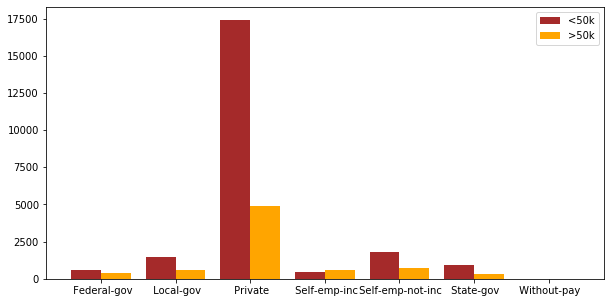

In [498]:
plt.figure(figsize=(10,5))
plotBarGraph("JobType","horizontal")

From above graph we can draw following conclusion:
1. most of the people are working in private sector

#### wrt Education type

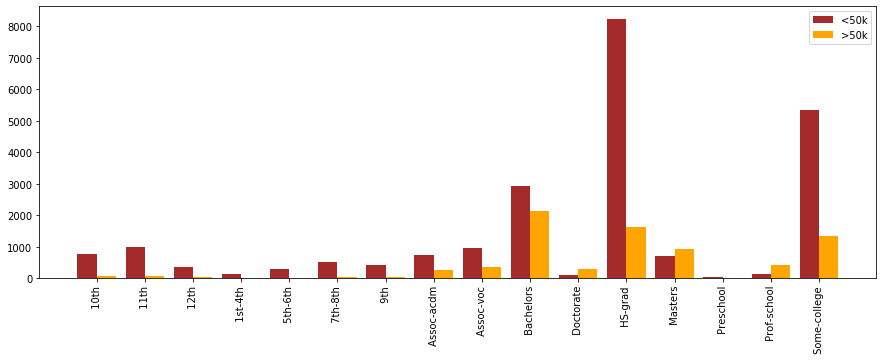

In [499]:
plt.figure(figsize=(15,5))
plotBarGraph("EdType","vertical")

From above graph we can draw following conclusion:
1. most of the people earning sal>50k are having bachelor degree
2. HS-grad education type has good number of people with sal<50k as well as sal>50k
3. most of the school professors are having sal>50k
4. most of the lower grade education type has lower salary i.e sal<50k

#### wrt marital status

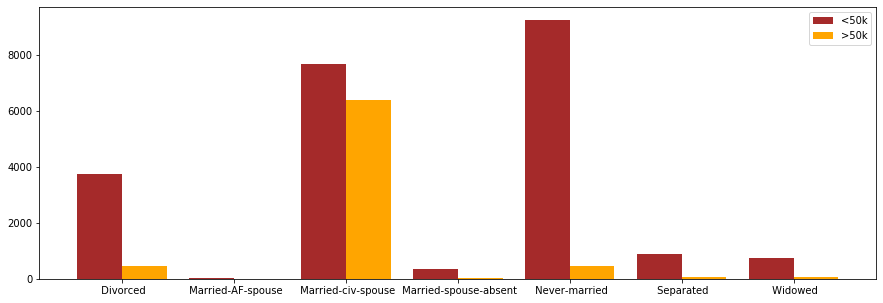

In [500]:
plt.figure(figsize=(15,5))
plotBarGraph("maritalstatus","horizontal")

Above graph shows that:
1. married-civ-spouse kind of status has most of the sal>50k 

#### wrt occupation

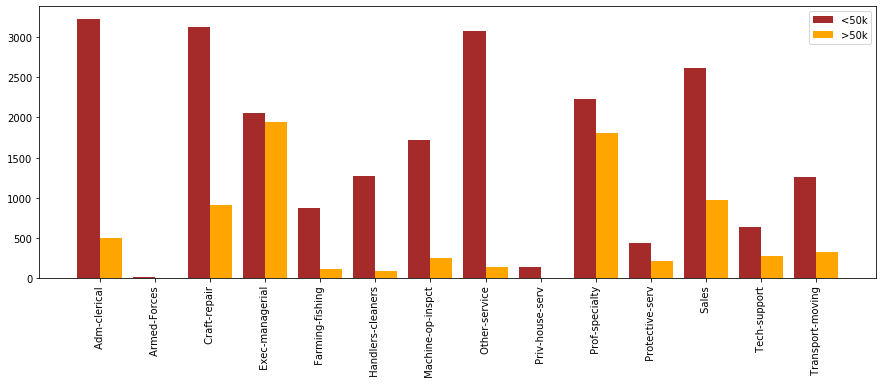

In [501]:
plt.figure(figsize=(15,5))
plotBarGraph("occupation","vertical")

graph shows that
1. Exec-managerial and prof-speciality are the occupation in which most of the people having sal>50k
2. very few people are in armed forces and having salary <50k

#### wrt relationship

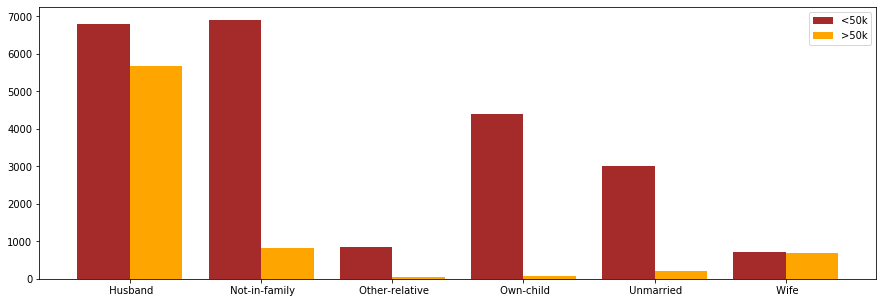

In [502]:
plt.figure(figsize=(15,5))
plotBarGraph("relationship","horizontal")

The above graph gives following facts:
1. husbands are having high salary i.e>50k

#### wrt race

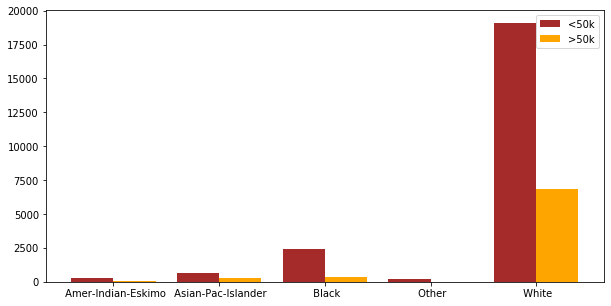

In [503]:
plt.figure(figsize=(10,5))
plotBarGraph("race","horizontal")

graph shows most of the people those who belong to race white having good salary .

#### wrt gender

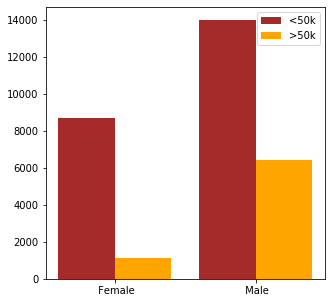

In [504]:
plt.figure(figsize=(5,5))
plotBarGraph("gender","horizontal")

the graph above again telling us the fact that number of male having higher salary is high than that of female (that means dataset is good)

#### wrt capitalgain

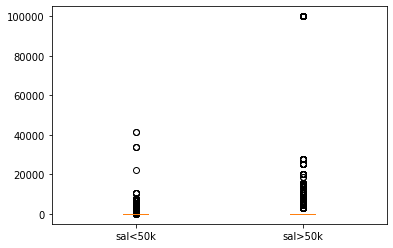

In [505]:
plt.boxplot([df1.capitalgain,df2.capitalgain])
plt.xticks([1,2],['sal<50k','sal>50k'])
plt.show()

outlier exist

#### wrt capitalloss

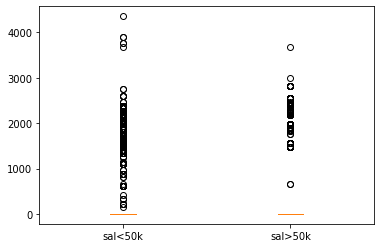

In [506]:
plt.boxplot([df1.capitalloss,df2.capitalloss])
plt.xticks([1,2],['sal<50k','sal>50k'])
plt.show()

outlier exist

#### wrt hoursperweek

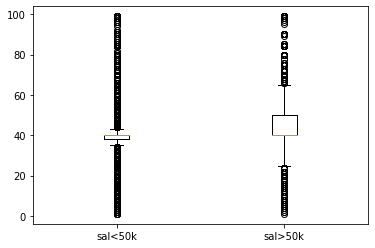

In [507]:
plt.boxplot([df1.hoursperweek,df2.hoursperweek])
plt.xticks([1,2],['sal<50k','sal>50k'])
plt.show()

outlier not detected

#### wrt nativecountry

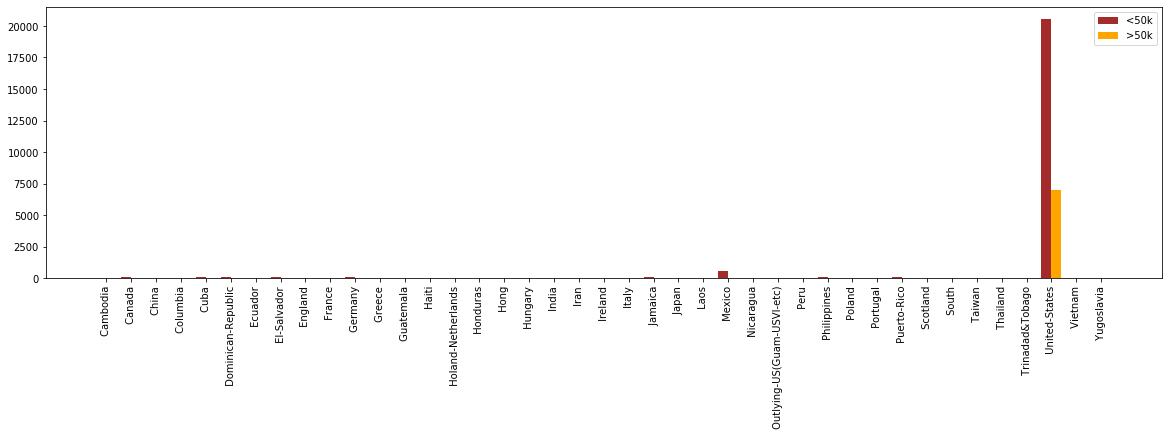

In [508]:
plt.figure(figsize=(20,5))
plotBarGraph("nativecountry","vertical")

most of the people having sal>50k are from thailand
and most of the people having sal<50k are from US

### summary and encoding of categorical variables

In [509]:
df.dtypes

age               int64
JobType          object
EdType           object
maritalstatus    object
occupation       object
relationship     object
race             object
gender           object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
nativecountry    object
SalStat          object
dtype: object

#### Target var

In [510]:
df.SalStat.value_counts()

 less than or equal to 50,000    22654
 greater than 50,000              7508
Name: SalStat, dtype: int64

In [511]:
sal_map={" less than or equal to 50,000":0," greater than 50,000":1}
df['SalStat']=df.SalStat.map(sal_map)
df.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,0
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,0
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,1
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,0
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,0


#### Jobtype

In [512]:
df.JobType.value_counts()

 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: JobType, dtype: int64

In [513]:
df.JobType.replace([" Self-emp-not-inc"," Self-emp-inc"]," Private",inplace=True)
df.JobType.replace([" Local-gov"," State-gov", " Federal-gov"," Without-pay"]," public",inplace=True)

In [514]:
df.JobType.value_counts()

 Private    25859
 public      4303
Name: JobType, dtype: int64

In [515]:
df=pd.get_dummies(df,columns=['JobType'],drop_first=True)

In [516]:
df.columns

Index(['age', 'EdType', 'maritalstatus', 'occupation', 'relationship', 'race',
       'gender', 'capitalgain', 'capitalloss', 'hoursperweek', 'nativecountry',
       'SalStat', 'JobType_ public'],
      dtype='object')

#### Education type

In [517]:
df.EdType.value_counts()

 HS-grad         9840
 Some-college    6678
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: EdType, dtype: int64

In [518]:
ed_map={" Preschool":1," 1st-4th":2," 5th-6th":3," 7th-8th":4," 9th":5," 10th":6," 11th":7," 12th":8," Some-college":9,
        " Assoc-voc":10," Assoc-acdm":11," Prof-school":12," Bachelors":13," Masters":14," HS-grad":15," Doctorate":16}
df['EdType']=df.EdType.map(ed_map)

In [519]:
df.EdType.value_counts()

15    9840
9     6678
13    5044
14    1627
10    1307
7     1048
11    1008
6      820
4      557
12     542
5      455
8      377
16     375
3      288
2      151
1       45
Name: EdType, dtype: int64

In [520]:
df.head()

,age,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat,JobType_ public
0,45,15,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,0,0
1,24,15,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,0,1
2,44,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,1,0
3,27,5,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,0,0
4,20,9,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,0,0


#### Marital status

In [521]:
df.maritalstatus.value_counts()

 Married-civ-spouse       14065
 Never-married             9726
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: maritalstatus, dtype: int64

In [522]:
df.maritalstatus.replace([' Married-civ-spouse',' Married-spouse-absent',' Married-AF-spouse',' Separated'],"married",inplace=True)
df.maritalstatus.replace([' Never-married',' Divorced',' Widowed'],"unmarried",inplace=True)

In [523]:
df.maritalstatus.value_counts()

married      15395
unmarried    14767
Name: maritalstatus, dtype: int64

In [524]:
df=pd.get_dummies(df,columns=['maritalstatus'],drop_first=True)

In [525]:
df.columns

Index(['age', 'EdType', 'occupation', 'relationship', 'race', 'gender',
       'capitalgain', 'capitalloss', 'hoursperweek', 'nativecountry',
       'SalStat', 'JobType_ public', 'maritalstatus_unmarried'],
      dtype='object')

#### Occupation

In [526]:
df.occupation.value_counts()

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

In [527]:
occ_map=df.groupby(['occupation'])['SalStat'].mean().to_dict()
df['occupation']=df.occupation.map(occ_map)
df.head()

,age,EdType,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat,JobType_ public,maritalstatus_unmarried
0,45,15,0.133835,Not-in-family,White,Female,0,0,28,United-States,0,0,1
1,24,15,0.111111,Own-child,White,Male,0,0,40,United-States,0,1,1
2,44,9,0.448489,Husband,White,Male,0,0,40,United-States,1,0,0
3,27,5,0.225310,Other-relative,White,Male,0,0,40,Mexico,0,0,1
4,20,9,0.270647,Not-in-family,White,Male,0,0,35,United-States,0,0,1


#### Relationship

In [528]:
df.relationship.value_counts()

 Husband           12463
 Not-in-family      7726
 Own-child          4466
 Unmarried          3212
 Wife               1406
 Other-relative      889
Name: relationship, dtype: int64

In [529]:
rel_map=df.groupby(['relationship'])['SalStat'].mean().to_dict()
df['relationship']=df.relationship.map(rel_map)
df.head()

,age,EdType,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat,JobType_ public,maritalstatus_unmarried
0,45,15,0.133835,0.106523,White,Female,0,0,28,United-States,0,0,1
1,24,15,0.111111,0.014330,White,Male,0,0,40,United-States,0,1,1
2,44,9,0.448489,0.455669,White,Male,0,0,40,United-States,1,0,0
3,27,5,0.225310,0.039370,White,Male,0,0,40,Mexico,0,0,1
4,20,9,0.270647,0.106523,White,Male,0,0,35,United-States,0,0,1


#### Race

In [530]:
df.race.value_counts()

 White                 25933
 Black                  2817
 Asian-Pac-Islander      895
 Amer-Indian-Eskimo      286
 Other                   231
Name: race, dtype: int64

In [531]:
df.race.replace([' Black',' Asian-Pac-Islander',' Amer-Indian-Eskimo'],' Other',inplace=True)
df.race.value_counts()

 White    25933
 Other     4229
Name: race, dtype: int64

In [532]:
df=pd.get_dummies(df,columns=['race'],drop_first=True)
df.columns

Index(['age', 'EdType', 'occupation', 'relationship', 'gender', 'capitalgain',
       'capitalloss', 'hoursperweek', 'nativecountry', 'SalStat',
       'JobType_ public', 'maritalstatus_unmarried', 'race_ White'],
      dtype='object')

#### Gender

In [533]:
df.gender.value_counts()

 Male      20380
 Female     9782
Name: gender, dtype: int64

In [534]:
df=pd.get_dummies(df,columns=['gender'],drop_first=True)
df.columns

Index(['age', 'EdType', 'occupation', 'relationship', 'capitalgain',
       'capitalloss', 'hoursperweek', 'nativecountry', 'SalStat',
       'JobType_ public', 'maritalstatus_unmarried', 'race_ White',
       'gender_ Male'],
      dtype='object')

#### nativecountry

In [535]:
df.nativecountry.value_counts()

 United-States                 27504
 Mexico                          610
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 India                           100
 El-Salvador                     100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 China                            68
 Italy                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        63
 Japan                            59
 Poland                           56
 Columbia                         56
 Haiti                            42
 Iran                             42
 Taiwan                           42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 Greece                           29
 

In [536]:
ls=df.nativecountry.unique().tolist()
ls.pop(0)
print(ls)

[' Mexico', ' Portugal', ' El-Salvador', ' Poland', ' France', ' Puerto-Rico', ' Canada', ' Cuba', ' Taiwan', ' Philippines', ' Dominican-Republic', ' Jamaica', ' Honduras', ' Haiti', ' Germany', ' Guatemala', ' England', ' Italy', ' China', ' India', ' South', ' Japan', ' Yugoslavia', ' Iran', ' Thailand', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Cambodia', ' Vietnam', ' Hong', ' Columbia', ' Ireland', ' Ecuador', ' Laos', ' Hungary', ' Holand-Netherlands']


In [537]:
df.nativecountry.replace(ls," others",inplace=True)
df.nativecountry.unique()

array([' United-States', ' others'], dtype=object)

In [538]:
df=pd.get_dummies(df,columns=['nativecountry'],drop_first=True)
df.head()

,age,EdType,occupation,relationship,capitalgain,capitalloss,hoursperweek,SalStat,JobType_ public,maritalstatus_unmarried,race_ White,gender_ Male,nativecountry_ others
0,45,15,0.133835,0.106523,0,0,28,0,0,1,1,0,0
1,24,15,0.111111,0.014330,0,0,40,0,1,1,1,1,0
2,44,9,0.448489,0.455669,0,0,40,1,0,0,1,1,0
3,27,5,0.225310,0.039370,0,0,40,0,0,1,1,1,1
4,20,9,0.270647,0.106523,0,0,35,0,0,1,1,1,0


#### hours per week

In [539]:
df.hoursperweek.unique()

array([28, 40, 35, 55, 50, 60, 20, 45, 16, 24,  6, 30, 25, 36, 42,  8, 80,
       58,  9, 46, 48, 32, 12, 70, 47, 37, 21, 64, 26, 14, 15, 38, 10,  5,
       65, 72, 18, 56, 75,  7, 52, 44, 99, 43, 33, 53, 39, 54, 62, 59, 57,
       41, 78, 90, 34, 66, 11, 49, 84, 17, 68, 22,  3, 13, 27, 98, 85, 31,
       51, 77, 63, 23,  2,  4, 87, 88, 73, 89, 97, 19, 94, 29, 96, 67, 82,
        1, 86, 91, 81, 76, 92, 61, 74, 95], dtype=int64)

### Logistic Regression

In [540]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,classification_report,roc_auc_score

In [541]:
df.corr().SalStat.sort_values()

maritalstatus_unmarried   -0.410133
nativecountry_ others     -0.040204
JobType_ public            0.054129
race_ White                0.084735
EdType                     0.130121
capitalloss                0.150053
gender_ Male               0.216699
capitalgain                0.221196
hoursperweek               0.229480
age                        0.241998
occupation                 0.349658
relationship               0.454619
SalStat                    1.000000
Name: SalStat, dtype: float64

In [542]:
temp_list=df.columns.tolist()
temp_list

['age',
 'EdType',
 'occupation',
 'relationship',
 'capitalgain',
 'capitalloss',
 'hoursperweek',
 'SalStat',
 'JobType_ public',
 'maritalstatus_unmarried',
 'race_ White',
 'gender_ Male',
 'nativecountry_ others']

In [543]:
Y=df[temp_list.pop(7)]
X=df[['maritalstatus_unmarried','relationship','occupation']]
# X=df[temp_list]

In [544]:
X

,maritalstatus_unmarried,relationship,occupation
0,1,0.106523,0.133835
1,1,0.014330,0.111111
2,0,0.455669,0.448489
3,1,0.039370,0.225310
4,1,0.106523,0.270647
...,...,...,...
31973,1,0.106523,0.116279
31974,1,0.106523,0.326087
31975,0,0.455669,0.133835
31976,0,0.493599,0.133835


In [545]:
Y

0        0
1        0
2        1
3        0
4        0
        ..
31973    0
31974    0
31975    0
31976    0
31977    0
Name: SalStat, Length: 30162, dtype: int64

In [546]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [547]:
LRmodel=LogisticRegression()
LRmodel.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [548]:
y_test_pred1=LRmodel.predict(x_test)

In [549]:
ac=accuracy_score(y_test,y_test_pred1)
ac

0.801425493121167

In [550]:
LRmodel.score(x_test,y_test)

0.801425493121167

In [551]:
confusion_matrix(y_test,y_test_pred1)

array([[4229,  319],
       [ 879,  606]], dtype=int64)

In [552]:
f1_score(y_test,y_test_pred1)

0.5029045643153528

In [553]:
print(classification_report(y_test,y_test_pred1))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88      4548
           1       0.66      0.41      0.50      1485

    accuracy                           0.80      6033
   macro avg       0.74      0.67      0.69      6033
weighted avg       0.79      0.80      0.78      6033



In [554]:
LRmodel.coef_

array([[-0.28908366,  5.73094262,  5.6709694 ]])

In [555]:
LRmodel.intercept_

array([-4.39439751])

In [556]:
cvs1=cross_val_score(LRmodel,X,Y,cv=5)
cvs1

array([0.80573512, 0.80871871, 0.80769231, 0.81167109, 0.81216844])

In [557]:
cvs1.mean()

0.8091971334934606

### KNN

In [558]:
knnmodel=KNeighborsClassifier(n_neighbors=1)
knnmodel.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [559]:
y_test_pred2=knnmodel.predict(x_test)

In [560]:
accuracy_score(y_test,y_test_pred2)

0.7192110061329355

In [561]:
y_train_pred2=knnmodel.predict(x_train)
accuracy_score(y_train,y_train_pred2)

0.7240250321190269

In [562]:
confusion_matrix(y_test,y_test_pred2)

array([[3422, 1126],
       [ 568,  917]], dtype=int64)

In [563]:
print(classification_report(y_test_pred2,y_test))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80      3990
           1       0.62      0.45      0.52      2043

    accuracy                           0.72      6033
   macro avg       0.68      0.65      0.66      6033
weighted avg       0.71      0.72      0.71      6033



In [564]:
cvs2=cross_val_score(knnmodel,X,Y,cv=10)
cvs2

array([0.71428571, 0.79317203, 0.7301061 , 0.69462865, 0.77022546,
       0.76193634, 0.78713528, 0.75994695, 0.75928382, 0.74535809])

In [565]:
cvs2.mean()

0.7516078429131474

In [566]:
roc_auc_score(y_test,y_test_pred2)

0.6849635315334524

In [567]:
error_list=[]
accuracy_list=[]

for i in range(1,50):
    knnmodeltemp=KNeighborsClassifier(n_neighbors=i)
    knnmodeltemp.fit(x_train,y_train)
    y_pred_temp=knnmodeltemp.predict(x_test)
    error_list.append(np.mean(y_pred_temp!=y_test))
    accuracy_list.append(accuracy_score(y_test,y_pred_temp))

Text(0, 0.5, 'Error rate')

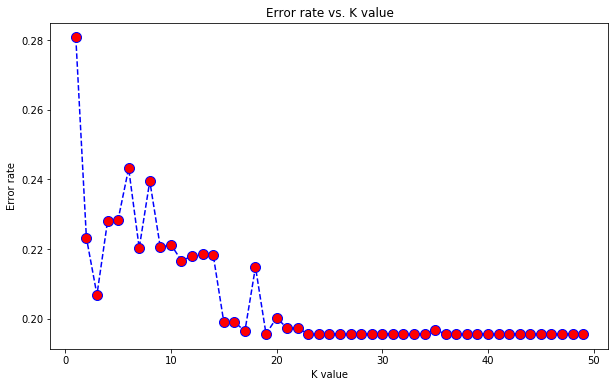

In [568]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_list,color="blue",linestyle="dashed",marker="o",markerfacecolor="red",markersize=10)
plt.title("Error rate vs. K value")
plt.xlabel("K value")
plt.ylabel("Error rate")

In [569]:
error_list.index(min(error_list))

18

Text(0, 0.5, 'accuracy_score')

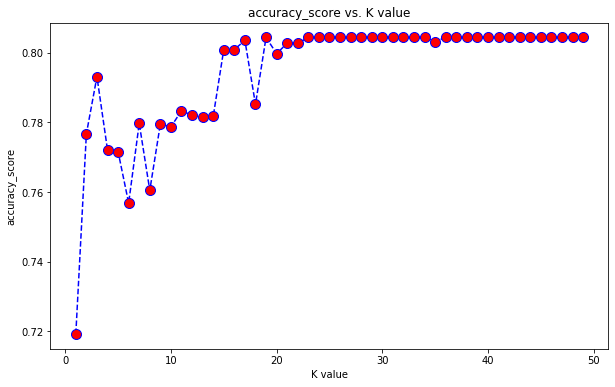

In [570]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),accuracy_list,color="blue",linestyle="dashed",marker="o",markerfacecolor="red",markersize=10)
plt.title("accuracy_score vs. K value")
plt.xlabel("K value")
plt.ylabel("accuracy_score")

In [571]:
max(accuracy_list)

0.8044090833747721

### KNN2 for 19 neighbours

In [572]:
knnmodel2=KNeighborsClassifier(n_neighbors=19)
knnmodel2.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                     weights='uniform')

In [573]:
y_test_pred3=knnmodel2.predict(x_test)
accuracy_score(y_test,y_test_pred3)

0.8044090833747721

In [574]:
cvs3=cross_val_score(knnmodel2,X,Y,cv=10)

In [575]:
cvs3.mean()

0.8059809180338823

#### Normalizing capitalgain and capitalloss

In [576]:
from sklearn import preprocessing

In [577]:
df.capitalgain.unique()

array([    0, 15024,  7688, 20051,  5013,  2174,  6849,  1055,  5178,
        4101,  8614,  3411,  2597, 25236,  4386,  4650,  7298,  2407,
         594, 14084,  2463,  3103, 10605,  2964,  3325,  2580,  3471,
        4865, 99999,  6514,  1471,  3674,  2329,  2105,  2885, 10520,
        2202,  2961, 27828,  6767,  2228,  1506, 13550,  1409,  2635,
        5556, 14344,  4787,  3781,  3137,  3818,   914,  4064,   401,
        2829,  2977,  4934,  2062,  2354,  3464,  5455, 15020,  1424,
        3273, 22040,  4416, 10566,  4931,  7430, 34095,  6497,  3908,
         114,  2346,  2907,  1151,  9386,  2414,  2290,  3418, 15831,
       41310,  4508,  2538,  2050,  3456,  1848,  3887,  7896,  5721,
        9562,  6418,  1455,  2036,  3942,  1831,  2176, 11678,  2936,
        2993,  7443,  6360,  4687,  1797,  6723,  2009,  3432,  6097,
        1639,  2653, 18481, 25124,  7978,   991,  1173,  2387,  5060,
        1086], dtype=int64)

In [578]:
min_max_scaler=preprocessing.MinMaxScaler()
df.capitalgain=min_max_scaler.fit_transform(df[['capitalgain']])
df.capitalgain.unique()

array([0.        , 0.1502415 , 0.07688077, 0.20051201, 0.0501305 ,
       0.02174022, 0.06849068, 0.01055011, 0.05178052, 0.04101041,
       0.08614086, 0.03411034, 0.02597026, 0.25236252, 0.04386044,
       0.04650047, 0.07298073, 0.02407024, 0.00594006, 0.14084141,
       0.02463025, 0.03103031, 0.10605106, 0.0296403 , 0.03325033,
       0.02580026, 0.03471035, 0.04865049, 1.        , 0.06514065,
       0.01471015, 0.03674037, 0.02329023, 0.02105021, 0.02885029,
       0.10520105, 0.02202022, 0.0296103 , 0.27828278, 0.06767068,
       0.02228022, 0.01506015, 0.13550136, 0.01409014, 0.02635026,
       0.05556056, 0.14344143, 0.04787048, 0.03781038, 0.03137031,
       0.03818038, 0.00914009, 0.04064041, 0.00401004, 0.02829028,
       0.0297703 , 0.04934049, 0.02062021, 0.02354024, 0.03464035,
       0.05455055, 0.1502015 , 0.01424014, 0.03273033, 0.2204022 ,
       0.04416044, 0.10566106, 0.04931049, 0.07430074, 0.34095341,
       0.06497065, 0.03908039, 0.00114001, 0.02346023, 0.02907

In [579]:
df.capitalloss.unique()

array([   0, 1977, 1380, 1887, 1902, 1721, 2051, 2377, 1669, 2352, 1672,
        653, 2415, 2392, 1504, 1719, 1590, 1651, 1762, 1876, 1628, 1848,
       1564, 2001, 1980, 1340, 2339, 1740, 2002, 1579, 1741, 1408, 2258,
       1485, 1602, 2547, 2206, 2205, 1726, 2444, 1138, 2238, 2179,  625,
        213, 1816, 1539,  880, 1668, 1092, 1594, 2042, 2231, 1844,  810,
       2824, 2559, 2057, 1573, 1974,  974, 2174, 2149, 1735, 1258, 2603,
       2282,  323, 2246, 1617, 1648, 1825, 3770, 1755, 3683, 2129, 4356,
       2267, 2080, 2457,  419,  155, 3900, 2201, 1944, 2467, 2754, 2472,
       3004, 1411], dtype=int64)

In [580]:
min_max_scaler=preprocessing.MinMaxScaler()
df.capitalloss=min_max_scaler.fit_transform(df[['capitalloss']])
df.capitalloss.unique()

array([0.        , 0.45385675, 0.31680441, 0.43319559, 0.43663912,
       0.39508724, 0.47084481, 0.54568411, 0.38314968, 0.5399449 ,
       0.38383838, 0.14990817, 0.55440771, 0.54912764, 0.34527089,
       0.3946281 , 0.36501377, 0.37901745, 0.40449954, 0.43067034,
       0.37373737, 0.42424242, 0.359045  , 0.45936639, 0.45454545,
       0.30762167, 0.53696051, 0.39944904, 0.45959596, 0.36248852,
       0.3996786 , 0.32323232, 0.51836547, 0.34090909, 0.3677686 ,
       0.58471074, 0.50642792, 0.50619835, 0.39623508, 0.5610652 ,
       0.26124885, 0.5137741 , 0.50022957, 0.14348026, 0.04889807,
       0.41689624, 0.35330579, 0.2020202 , 0.38292011, 0.25068871,
       0.36593205, 0.4687787 , 0.51216713, 0.42332415, 0.18595041,
       0.64830119, 0.58746556, 0.47222222, 0.36111111, 0.45316804,
       0.22359963, 0.49908173, 0.49334252, 0.39830119, 0.28879706,
       0.59756657, 0.52387511, 0.0741506 , 0.51561065, 0.37121212,
       0.37832874, 0.41896235, 0.86547291, 0.40289256, 0.84550

In [581]:
df.head()

,age,EdType,occupation,relationship,capitalgain,capitalloss,hoursperweek,SalStat,JobType_ public,maritalstatus_unmarried,race_ White,gender_ Male,nativecountry_ others
0,45,15,0.133835,0.106523,0.0,0.0,28,0,0,1,1,0,0
1,24,15,0.111111,0.014330,0.0,0.0,40,0,1,1,1,1,0
2,44,9,0.448489,0.455669,0.0,0.0,40,1,0,0,1,1,0
3,27,5,0.225310,0.039370,0.0,0.0,40,0,0,1,1,1,1
4,20,9,0.270647,0.106523,0.0,0.0,35,0,0,1,1,1,0


### KNN Model 3

In [582]:
knnmodel3=KNeighborsClassifier(n_neighbors=19)
knnmodel3.fit(x_train,y_train)
y_test_pred4=knnmodel3.predict(x_test)
accuracy_score(y_test,y_test_pred4)

0.8044090833747721

In [583]:
cross_val_score(knnmodel3,X,Y,cv=10)

array([0.80344713, 0.81206497, 0.8096817 , 0.81697613, 0.80669761,
       0.80503979, 0.81001326, 0.77486737, 0.81133952, 0.8096817 ])

### Logistic reg 2

In [584]:
LRmodel2=LogisticRegression()
LRmodel2.fit(x_train,y_train)
y_test_pred5=LRmodel2.predict(x_test)
accuracy_score(y_test,y_test_pred5)

0.801425493121167

In [585]:
cross_val_score(LRmodel2,X,Y,cv=10)

array([0.80013258, 0.81140206, 0.80437666, 0.81299735, 0.81100796,
       0.80470822, 0.81299735, 0.81001326, 0.81034483, 0.81399204])